In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
tr = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
ts = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [3]:
df =tr.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
perc =df.isnull().sum()/len(tr)*100
todelete = perc[perc >80].keys()
df.drop(columns=todelete)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [5]:
numcol =df._get_numeric_data().columns
dfnum = df[numcol]
df.drop(columns=numcol, inplace=True)

In [6]:
from sklearn.impute import SimpleImputer
imputernum = SimpleImputer(missing_values= np.nan, strategy= "mean")
imputercat = SimpleImputer(missing_values= np.nan, strategy= 'constant', fill_value='Missing')

In [7]:
df_num_imp= imputernum.fit_transform(dfnum)
df_cat_imp= imputercat.fit_transform(df)
df_cat_imp #this is an array
df_cat = pd.DataFrame(df_cat_imp, columns= df.columns)
df_num = pd.DataFrame(df_num_imp,columns= dfnum.columns)
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [8]:
df_num['SalePrice'].describe() #no tiene valores negativos


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

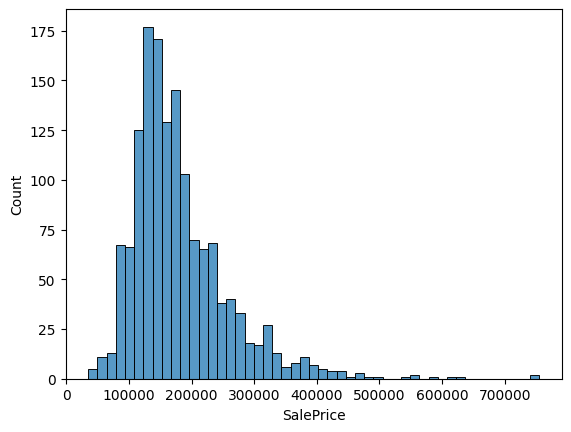

In [9]:
import seaborn as sns
sns.histplot(df_num['SalePrice'])

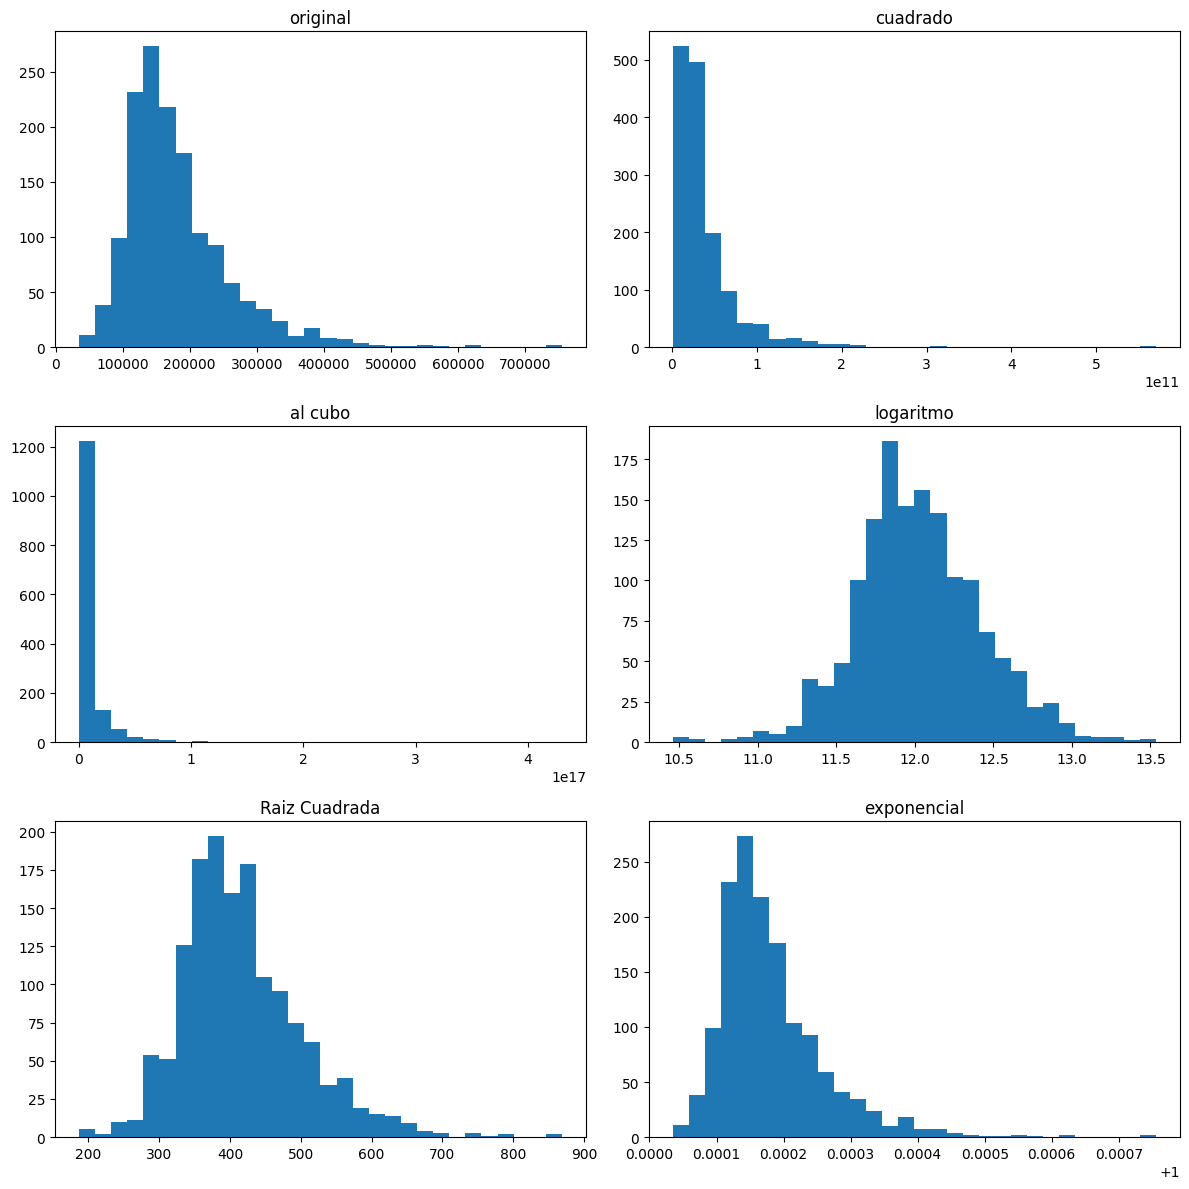

In [10]:
import matplotlib.pyplot as plt
z= dfnum['SalePrice']
fig, axs = plt.subplots(3,2, figsize=(12,12))

axs[0,0].hist(z, bins= 30)
axs[0,0].set_title('original')
axs[0,1].hist(z**2, bins= 30)
axs[0,1].set_title('cuadrado')
axs[1,0].hist(z**3, bins= 30)
axs[1,0].set_title('al cubo')
axs[1,1].hist(np.log(z), bins= 30)
axs[1,1].set_title('logaritmo')
axs[2,0].hist(np.sqrt(z), bins= 30)
axs[2,0].set_title('Raiz Cuadrada')
axs[2,1].hist(np.exp(z/1000000000), bins= 30)
axs[2,1].set_title('exponencial')

plt.tight_layout()
plt.show()


In [11]:
#log consigue que parezca una distribución más normal. por tanto vamos a transformar la columna en nuestro dataset
df_num['SalePrice'] = np.log(df_num['SalePrice'])

In [12]:
df_num.shape

(1460, 38)

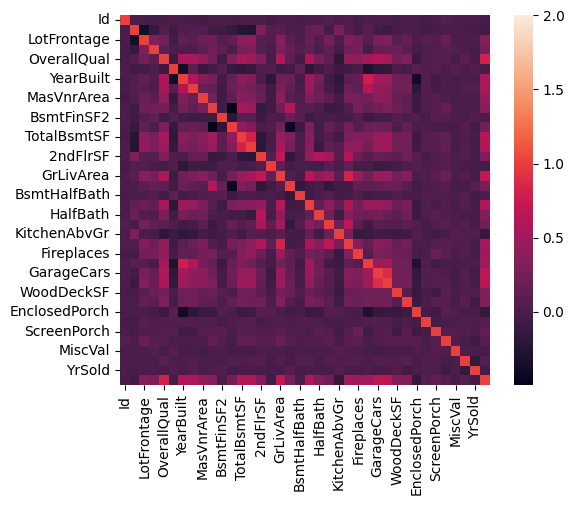

In [13]:
co =df_num.corr()
sns.heatmap(co,vmax=2, square=True)
plt.show()

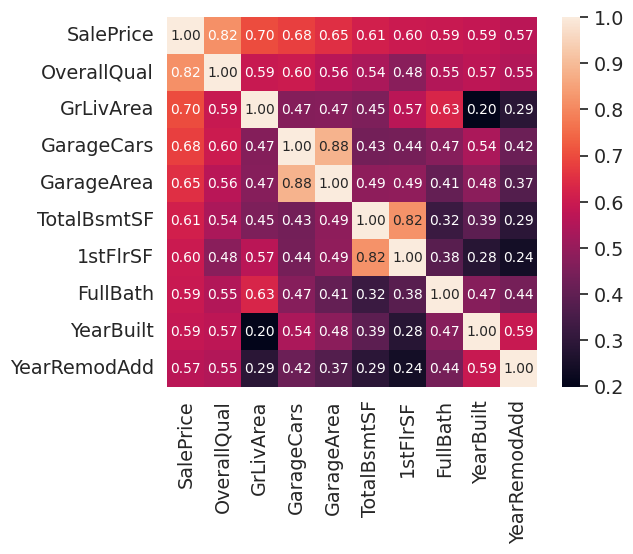

In [14]:
#manera para selecionar los mas correlacionados
k= 10
cols= co.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_num[cols].values.T)
sns.set(font_scale=1.25)
hm =sns.heatmap(cm, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
df_num['Bsm1FlrGarAreaSF'] = (df_num['TotalBsmtSF'] + df_num['1stFlrSF'] +df_num['GarageArea'])/3


In [16]:
df_num.drop(columns=['TotalBsmtSF', '1stFlrSF','GarageArea'], inplace=True)

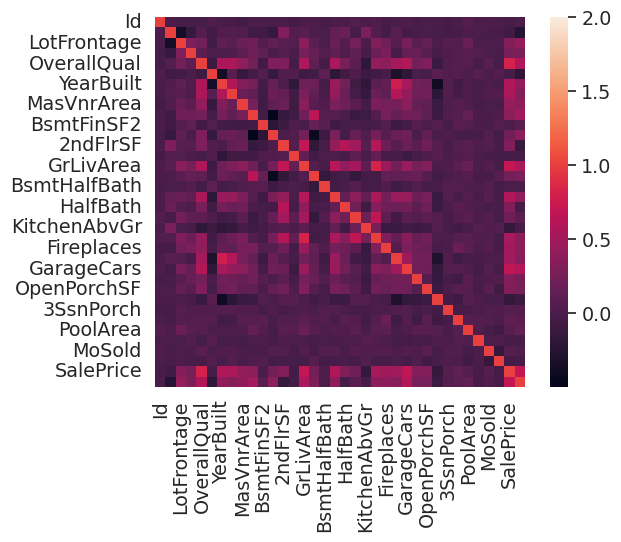

In [17]:
co =df_num.corr()
sns.heatmap(co,vmax=2, square=True)
plt.show()

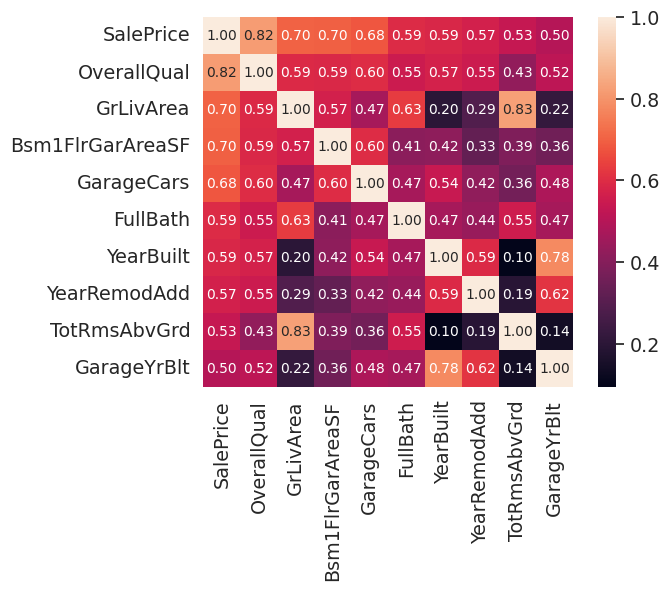

In [18]:
#manera para selecionar los mas correlacionados
k= 10
cols= co.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_num[cols].values.T)
sns.set(font_scale=1.25)
hm =sns.heatmap(cm, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
coli = ['SalePrice',
 'OverallQual',
 'GrLivArea',
 'Bsm1FlrGarAreaSF',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

In [20]:
coli = [i for i in cols]
coli

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'Bsm1FlrGarAreaSF',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

In [21]:
print(df_num.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'Bsm1FlrGarAreaSF'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

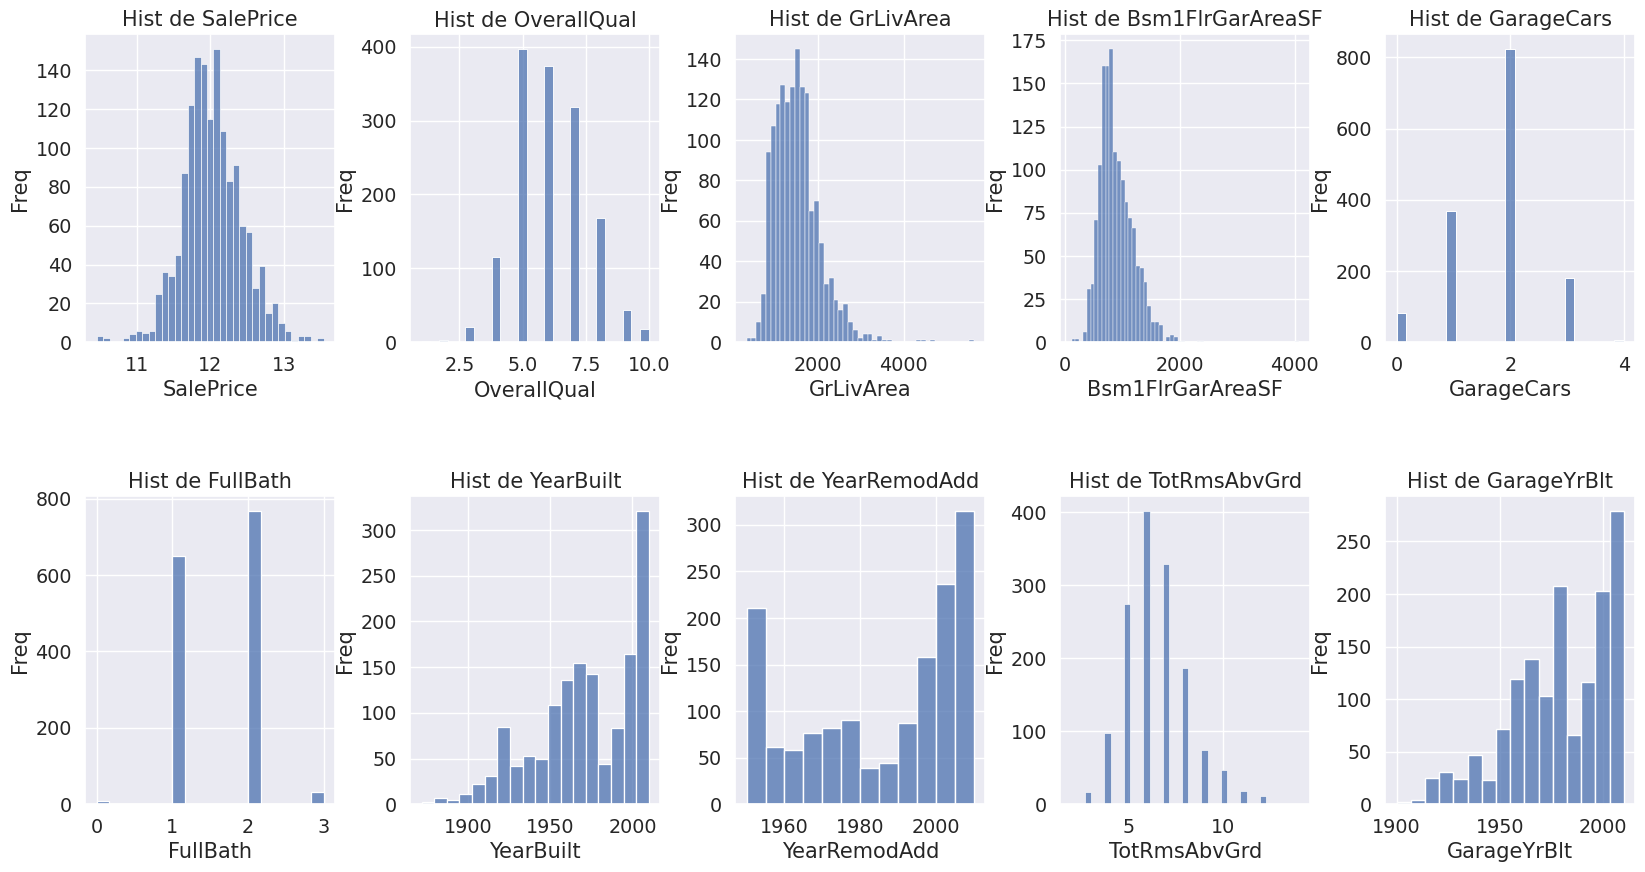

In [22]:
fig, axi = plt.subplots(2,5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, cols in enumerate(coli):
    row =i // 5
    col = i % 5
    
    sns.histplot(df_num[cols], ax= axi[row,col])
    axi[row,col].set_title(f'Hist de {cols}')
    axi[row,col].set_xlabel(cols)
    axi[row,col].set_ylabel('Freq')
plt.show()

ValueError: Could not interpret input 'OverallQual'

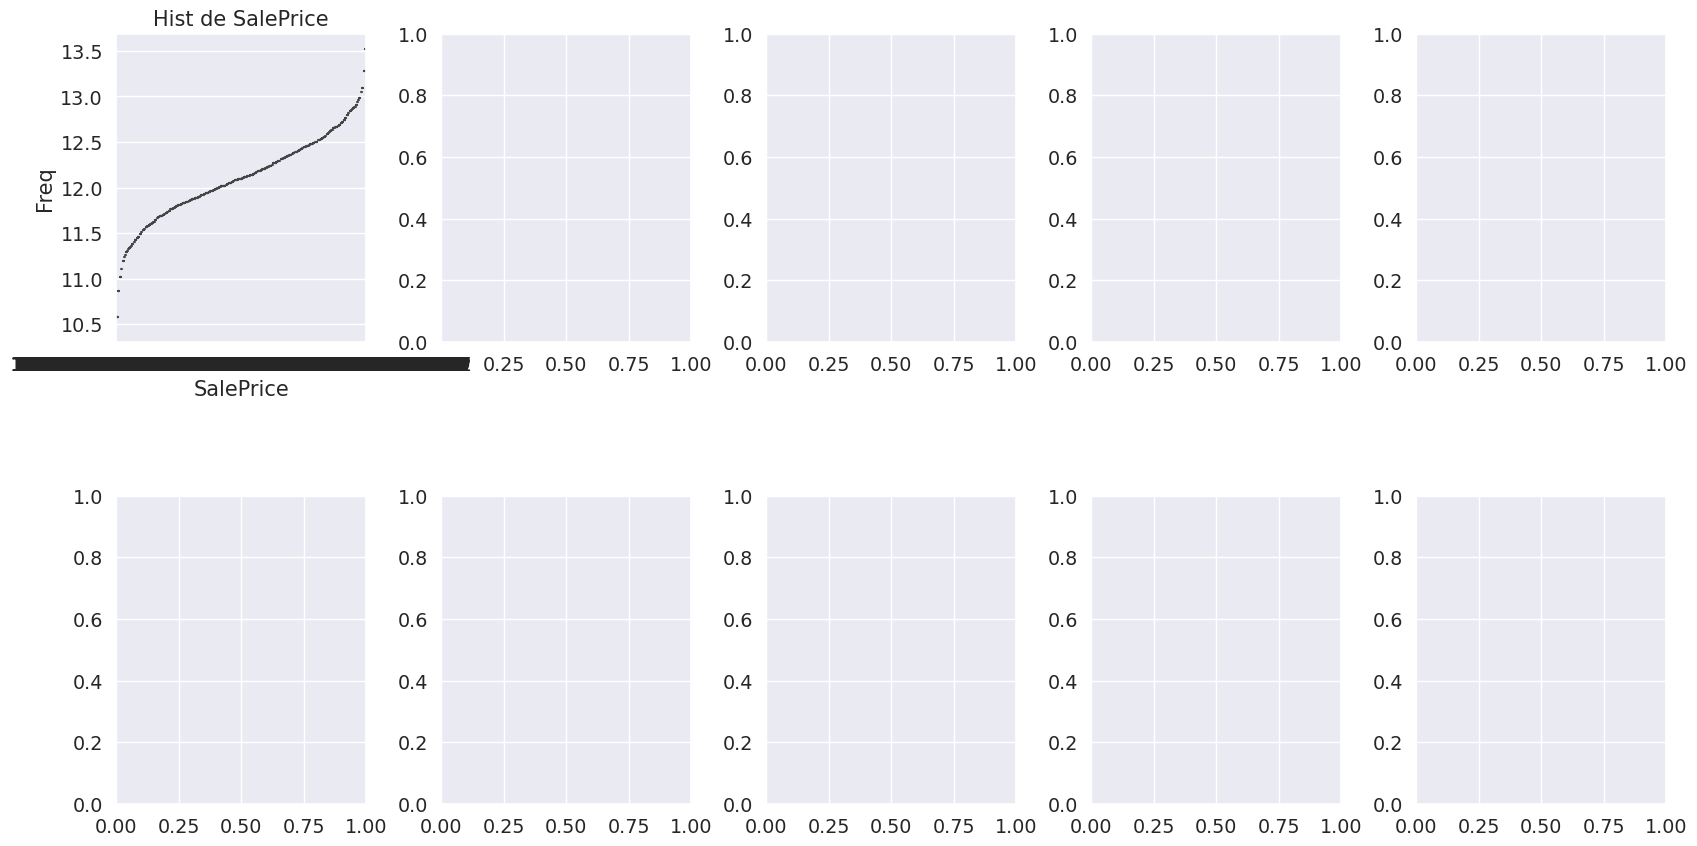

In [28]:
fig, axi = plt.subplots(2,5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, cols in enumerate(coli):
    row =i // 5
    col = i % 5
    
    sns.boxplot(x=cols,y='SalePrice',data=df_num, ax= axi[row,col])
    axi[row,col].set_title(f'Hist de {cols}')
    axi[row,col].set_xlabel(cols)
    axi[row,col].set_ylabel('Freq')
plt.show()

In [24]:
df_num['TotRmsAbvGrd'].unique()

array([ 8.,  6.,  7.,  9.,  5., 11.,  4., 10., 12.,  3.,  2., 14.])

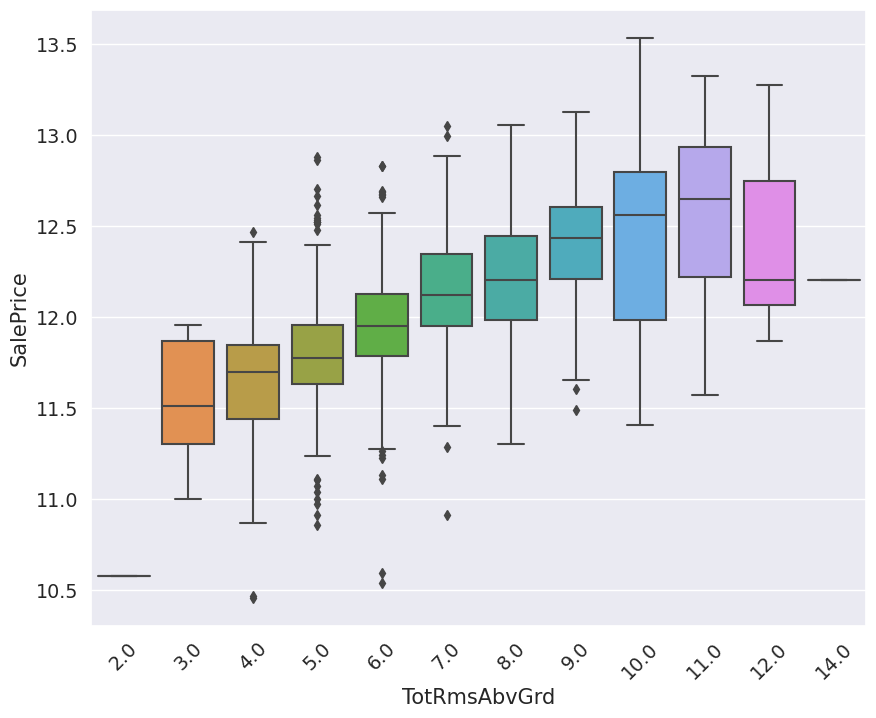

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='TotRmsAbvGrd', y= 'SalePrice', data= df_num)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

In [ ]:
maproms ={2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:4,10:4,11:4,12:4,14:4}
df_num['TotRmsAbcGrdGruped'] = df_num['TotRmsAbvGrd'].map(maproms)
df_num.drop(columns='TotRmsAbvGrd', axis=1, inplace=True)

In [29]:
mapover ={1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:5,10:5}
df_num['OverallQualGruped'] = df_num['OverallQual'].map(mapover)

plt.figure(figsize=(10,8))
sns.boxplot(x='OverallQualGruped', y= 'SalePrice', data= df_num)
plt.xlabel('OverallQualGruped')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

df_num.drop(columns='OverallQual', axis=1, inplace=True)

KeyError: 'OverallQual'

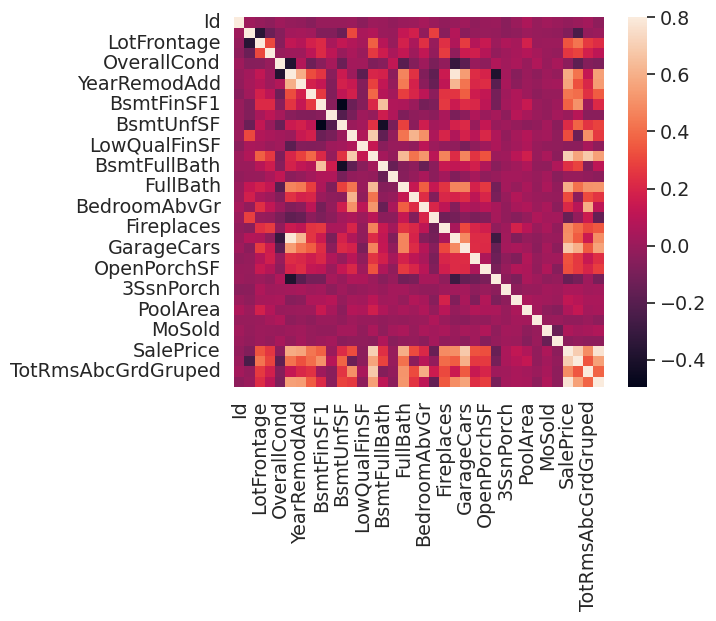

In [30]:
co =df_num.corr()
sns.heatmap(co,vmax=0.8, square=True)
plt.show()

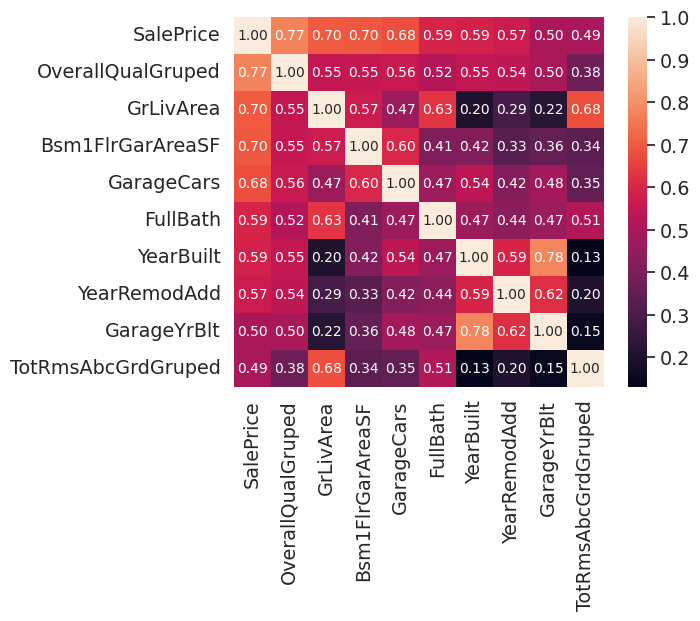

In [31]:
k= 10
cols= co.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_num[cols].values.T)
sns.set(font_scale=1.25)
hm =sns.heatmap(cm, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
cols.to_list()

['SalePrice',
 'OverallQualGruped',
 'GrLivArea',
 'Bsm1FlrGarAreaSF',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'TotRmsAbcGrdGruped']

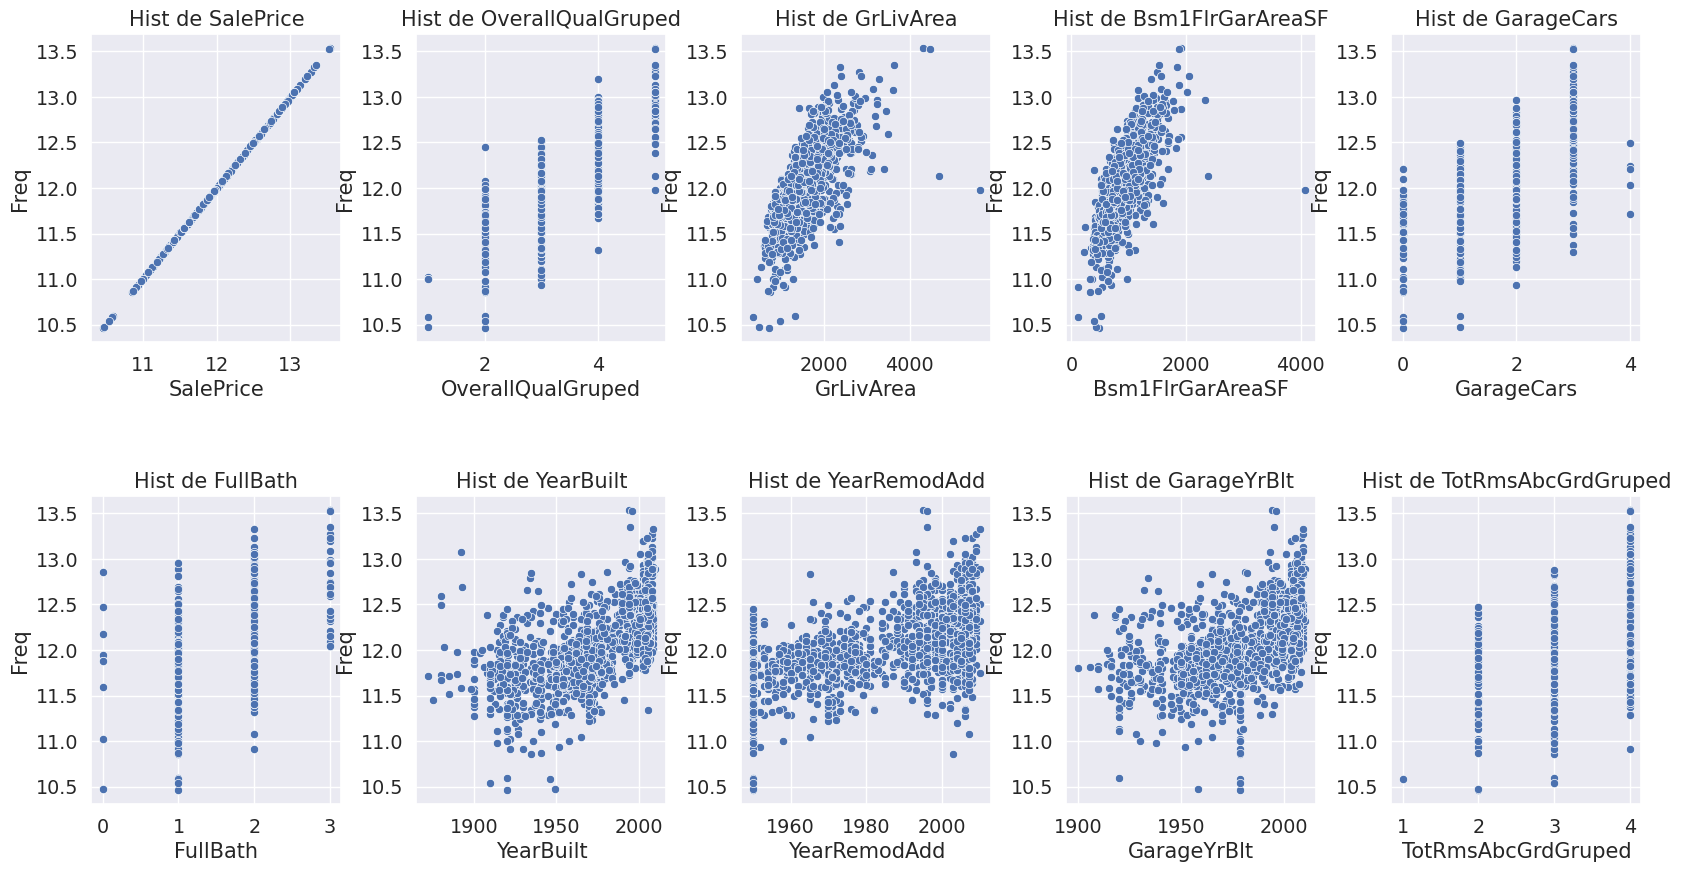

In [33]:
fig, axi = plt.subplots(2,5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, column in enumerate(cols.to_list()):
    row =i // 5
    col = i % 5
    
    sns.scatterplot(x=column,y='SalePrice',data=df_num, ax= axi[row,col])
    axi[row,col].set_title(f'Hist de {column}')
    axi[row,col].set_xlabel(column)
    axi[row,col].set_ylabel('Freq')
plt.show()

In [34]:
df_num.drop(index=df_num['GrLivArea'].nlargest(2).index, inplace=True)


In [35]:
df_num.drop(index=df_num['Bsm1FlrGarAreaSF'].nlargest(1).index, inplace=True)

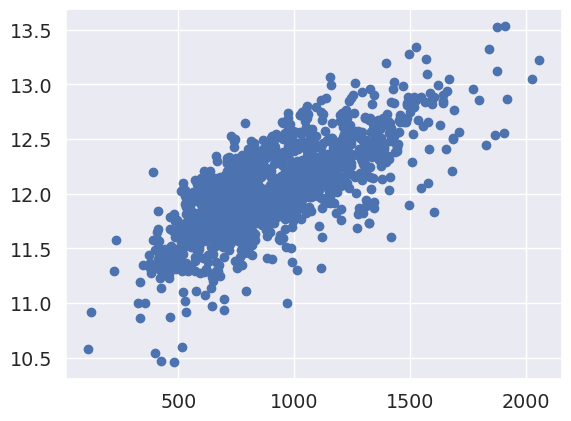

In [36]:
plt.scatter('Bsm1FlrGarAreaSF', 'SalePrice',data=df_num)

In [37]:
for columna in cols.tolist():
    print(columna,'tiene una asimetria de ', df_num[columna].skew())

SalePrice tiene una asimetria de  0.11792374211893303
OverallQualGruped tiene una asimetria de  0.0855552207723679
GrLivArea tiene una asimetria de  1.002780824698037
Bsm1FlrGarAreaSF tiene una asimetria de  0.7289610848655882
GarageCars tiene una asimetria de  -0.34167018013484174
FullBath tiene una asimetria de  0.024549602040748637
YearBuilt tiene una asimetria de  -0.6111891393072905
YearRemodAdd tiene una asimetria de  -0.5009743062730364
GarageYrBlt tiene una asimetria de  -0.6661304444153938
TotRmsAbcGrdGruped tiene una asimetria de  -0.5145187877526564


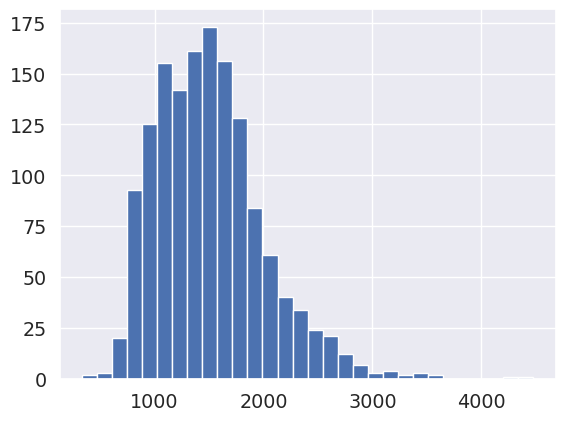

In [38]:
plt.hist(df_num['GrLivArea'],bins=30)
plt.show()

In [39]:
df_num['GrLivArealog'] = np.log(df_num['GrLivArea'])


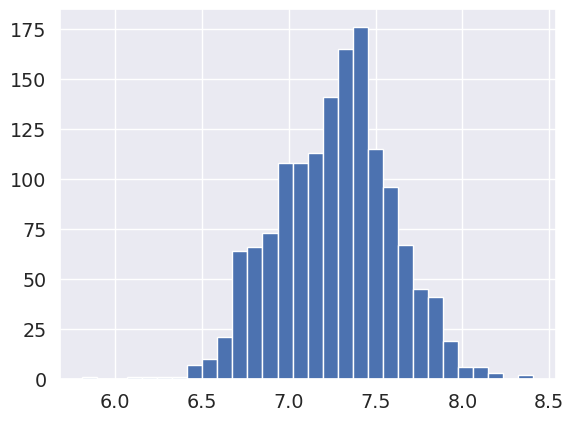

asimetria de GrLivArealog -0.07748339100245605


In [40]:
plt.hist(df_num['GrLivArealog'],bins=30)
plt.show()
print('asimetria de GrLivArealog', df_num['GrLivArealog'].skew())

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Bsm1FlrGarAreaSF',
       'TotRmsAbcGrdGruped', 'OverallQualGruped', 'GrLivArealog'],
      dtype='object')

In [43]:
x = df_num[['GrLivArea']]
y= df_num['SalePrice']
x.shape

(1457, 1)

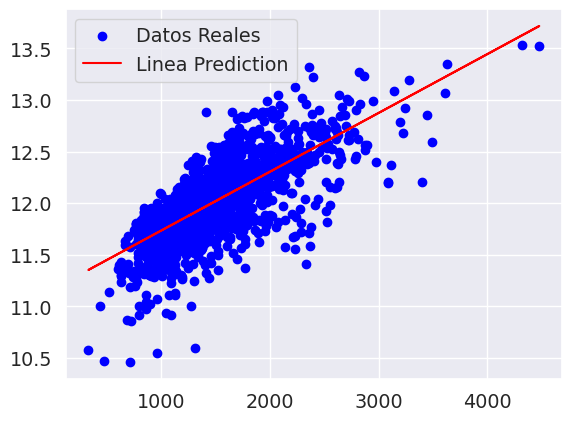

r2 logaritmicos  0.5240988960829229
r2   0.5168592680819667
mse logaritmico  0.07574241539217155
mse  55069.098990507395


In [44]:
modeli= linear_model.LinearRegression()
modeli.fit(x,y)
ypre= modeli.predict(x)

plt.scatter(x,y,color='blue',label='Datos Reales')
plt.plot(x, ypre, color='red', label='Linea Prediction') # linea logaritmizada
plt.legend()
plt.show()
print('r2 logaritmicos ', r2_score(y,ypre))
print('r2  ', r2_score(np.exp(y),np.exp(ypre)))
print('mse logaritmico ' , mean_squared_error(y,ypre))
print('mse ' , mean_squared_error(np.exp(y),np.exp(ypre), squared=False))

In [45]:
mapover ={1:'Qual 1',2:'Qual 1',3:'Qual 2',4:'Qual 2',5:'Qual 3',6:'Qual 3',7:'Qual 4',8:'Qual 4',9:'Qual 5',10:'Qual 5'}
df_num['OverallQualGruped']=df_num['OverallQualGruped'].map(mapover)
maproms ={2:'2 Romms',3:'3-4 Rooms',4:'3-4 Rooms',5:'5-6 Rooms',6:'5-6 Rooms',7:'7-9 Rooms',8:'7-9 Rooms',9:'7-9 Rooms',
          10:'10-14 Rooms',11:'10-14 Rooms',12:'10-14 Rooms',14:'10-14 Rooms'}
df_num['TotRmsAbcGrdGruped']=df_num['TotRmsAbcGrdGruped'].map(maproms)

In [46]:
mapcars ={ 0 : "No Garage", 1: '1Place', 2:'2Places', 3:'3Places', 4: '4Places'}
mapbath = { 0 : "No FullBath", 1: '1Baths', 2:'2Baths', 3:'3Baths'}
df_num['FullBath'], df_num['GarageCars'] = df_num['FullBath'].map(mapbath), df_num['GarageCars'].map(mapcars) 

In [47]:
df_num['FullBath'].unique()

array(['2Baths', '1Baths', '3Baths', 'No FullBath'], dtype=object)

In [48]:
X = df_num[cols[1:]]
y = df_num['SalePrice']

In [ ]:
X.head()

In [49]:
df_final = pd.get_dummies(X, drop_first=True, dtype=int)
df_final

,GrLivArea,Bsm1FlrGarAreaSF,YearBuilt,YearRemodAdd,GarageYrBlt,OverallQualGruped_Qual 2,OverallQualGruped_Qual 3,GarageCars_2Places,GarageCars_3Places,GarageCars_4Places,GarageCars_No Garage,FullBath_2Baths,FullBath_3Baths,FullBath_No FullBath,TotRmsAbcGrdGruped_3-4 Rooms
0,1710.0,753.333333,2003.0,2003.0,2003.0,1,0,1,0,0,0,1,0,0,1
1,1262.0,994.666667,1976.0,1976.0,1976.0,1,0,1,0,0,0,1,0,0,1
2,1786.0,816.000000,2001.0,2002.0,2001.0,1,0,1,0,0,0,1,0,0,1
3,1717.0,786.333333,1915.0,1970.0,1998.0,1,0,0,1,0,0,0,0,0,1
4,2198.0,1042.000000,2000.0,2000.0,2000.0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647.0,788.666667,1999.0,2000.0,1999.0,1,0,1,0,0,0,1,0,0,1
1456,2073.0,1371.666667,1978.0,1988.0,1978.0,1,0,1,0,0,0,1,0,0,1
1457,2340.0,864.000000,1941.0,2006.0,1941.0,1,0,0,0,0,0,1,0,0,1
1458,1078.0,798.666667,1950.0,1996.0,1950.0,1,0,0,0,0,0,0,0,0,1


In [50]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#conti = df_final[['GrLivArea','Bsm1FlrGarAreaSF','YearBuilt', 'YearRemodAdd','GarageYrBlt']]
conti =df_final
std.fit(conti)


StandardScaler()

In [51]:
finaltrans =std.transform(conti)
fifi =pd.DataFrame(finaltrans, columns= df_final.columns)

In [52]:
modlin = LinearRegression()
modlin.fit(fifi, y)
yhat =modlin.predict(fifi)

rmse_log = np.sqrt(mean_squared_error(yhat, y ))
r2_log = r2_score(yhat, y)

rmse = np.sqrt(mean_squared_error(np.exp(yhat), np.exp(y) ))
r2 = r2_score(np.exp(yhat), np.exp(y))



print('root mean squared error log', rmse_log)
print('r2 log', r2_log)
print('root mean squared error', rmse)
print('r2', r2)


root mean squared error log 0.15825274682977394
r2 log 0.8132608664906937
root mean squared error 29054.592273650847
r2 0.8474219329218567


In [53]:
ynorm = np.exp(y)
yprenormal = np.exp(yhat)

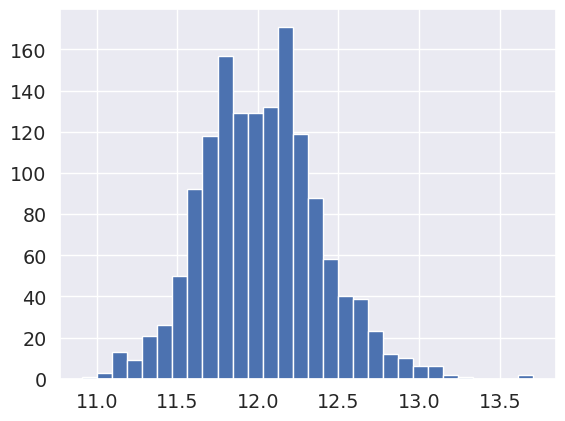

In [54]:
plt.hist(yhat,bins=30)
plt.show()

In [55]:
residuals = y- yhat

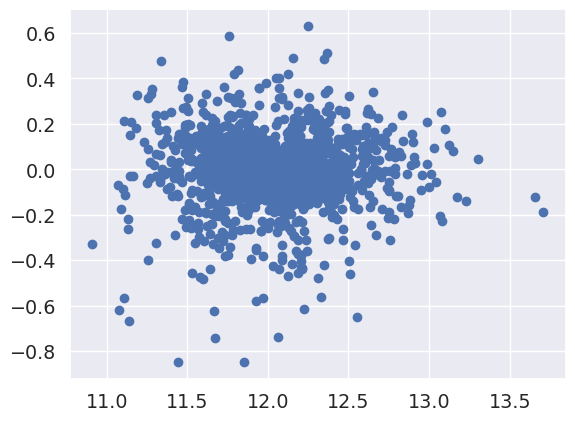

In [56]:
plt.scatter(yhat , residuals)
plt.show()

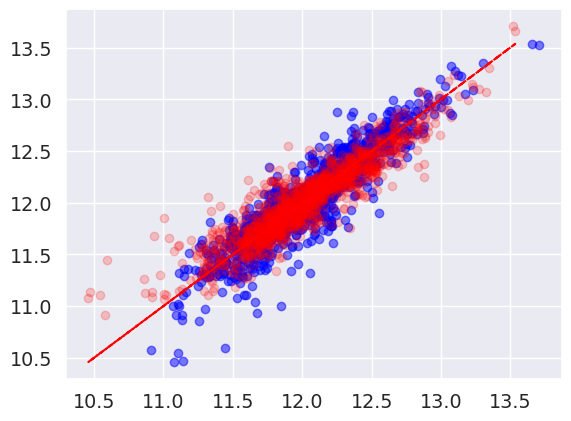

In [57]:
plt.scatter(yhat ,y ,color='blue', alpha=0.5)
plt.scatter(y ,yhat ,color='red', alpha=0.2)
plt.plot(y,y, color='red', linestyle='--')
plt.show()

In [60]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer

In [63]:
mmmodel= MinMaxScaler()
Rmodel =RobustScaler()
nmodel= Normalizer()

root mean squared error log 0.15825274682977394
r2 log 0.8132608664906944
root mean squared error 29054.592273650844
r2 0.8474219329218575


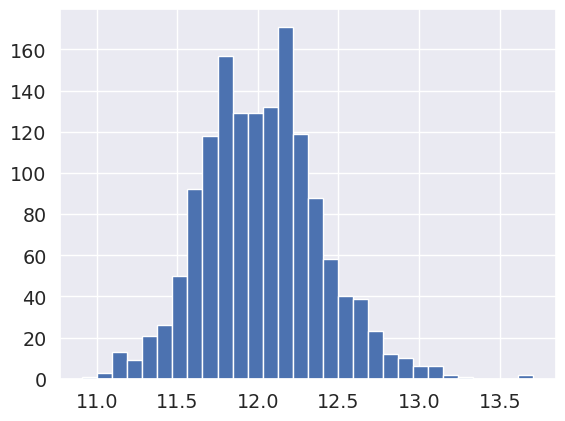

In [78]:
mmmodel.fit(conti)
mm =mmmodel.transform(conti)
mmdf = pd.DataFrame(mm, columns= df_final.columns)
modlin.fit(mmdf, y)
yhat =modlin.predict(mmdf)

rmse_log = np.sqrt(mean_squared_error(yhat, y ))
r2_log = r2_score(yhat, y)

rmse = np.sqrt(mean_squared_error(np.exp(yhat), np.exp(y) ))
r2 = r2_score(np.exp(yhat), np.exp(y))

print('root mean squared error log', rmse_log)
print('r2 log', r2_log)
print('root mean squared error', rmse)
print('r2', r2)

plt.hist(yhat,bins=30)
plt.show()

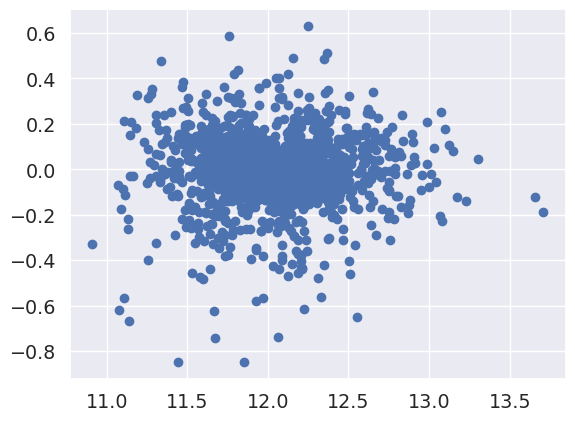

In [79]:
residuals = y- yhat
plt.scatter(yhat , residuals)
plt.show()


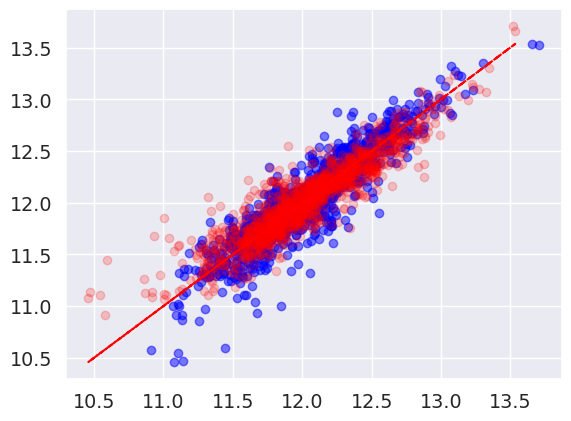

In [80]:
plt.scatter(yhat ,y ,color='blue', alpha=0.5)
plt.scatter(y ,yhat ,color='red', alpha=0.2)
plt.plot(y,y, color='red', linestyle='--')
plt.show()

root mean squared error log 0.15825274682977397
r2 log 0.8132608664906941
root mean squared error 29054.592273650855
r2 0.8474219329218573


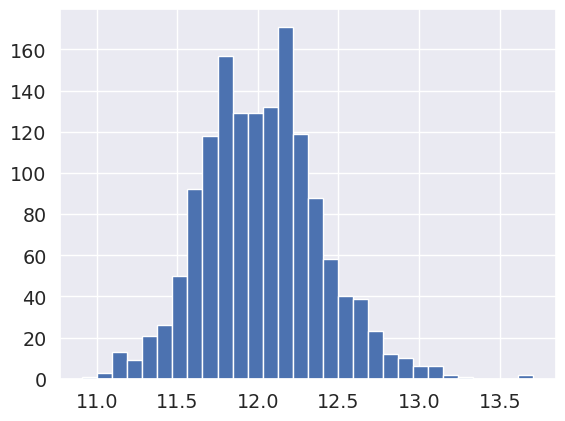

In [81]:
Rmodel.fit(conti)
rm =Rmodel.transform(conti)
rmdf = pd.DataFrame(rm, columns= df_final.columns)
modlin.fit(rmdf, y)
yhat =modlin.predict(rmdf)

rmse_log = np.sqrt(mean_squared_error(yhat, y ))
r2_log = r2_score(yhat, y)

rmse = np.sqrt(mean_squared_error(np.exp(yhat), np.exp(y) ))
r2 = r2_score(np.exp(yhat), np.exp(y))

print('root mean squared error log', rmse_log)
print('r2 log', r2_log)
print('root mean squared error', rmse)
print('r2', r2)

plt.hist(yhat,bins=30)
plt.show()

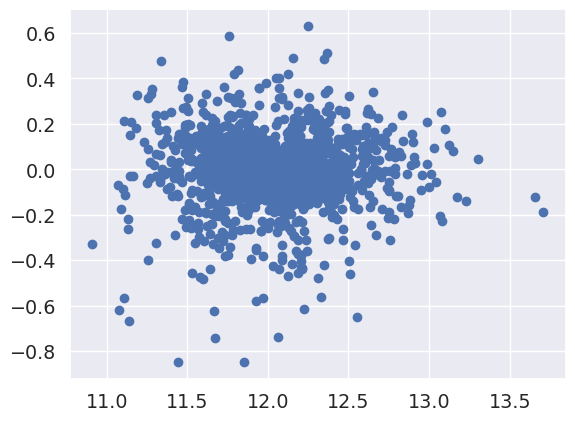

In [82]:
residuals = y- yhat
plt.scatter(yhat , residuals)
plt.show()

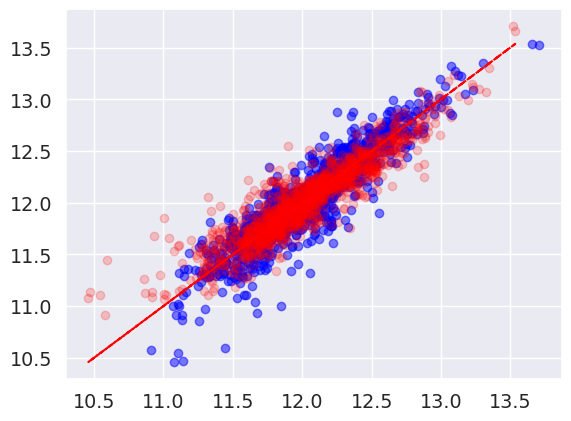

In [83]:
plt.scatter(yhat ,y ,color='blue', alpha=0.5)
plt.scatter(y ,yhat ,color='red', alpha=0.2)
plt.plot(y,y, color='red', linestyle='--')
plt.show()

root mean squared error with MinMaxScaler()  : 29054.592273650844
r2 with MinMaxScaler()  : 0.8474219329218575
root mean squared error with RobustScaler()  : 29054.592273650855
r2 with RobustScaler()  : 0.8474219329218573
root mean squared error with Normalizer()  : 34419.16655229789
r2 with Normalizer()  : 0.746660751773758


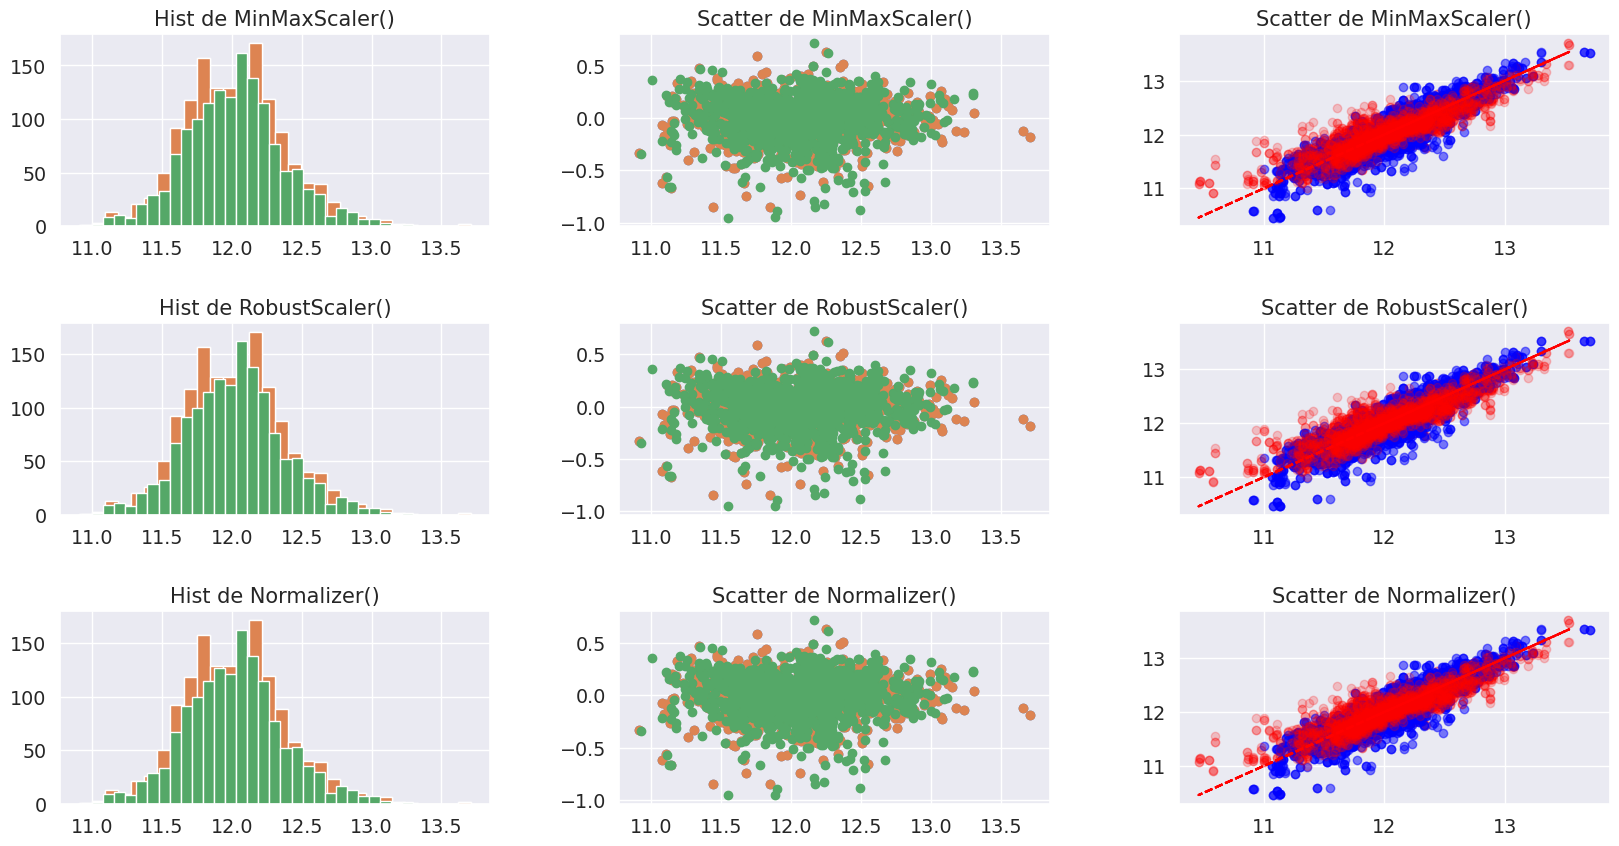

In [132]:
fig, axi = plt.subplots(3,3,figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
modlist= [mmmodel, Rmodel, nmodel] 

for i, mod in enumerate(modlist):
    mod.fit(conti)
    res= pd.DataFrame(mod.transform(conti), columns= conti.columns)
    modlin.fit(res, y)
    yhat =modlin.predict(res)
    rmse = np.sqrt(mean_squared_error(np.exp(yhat), np.exp(y) ))
    r2 = r2_score(np.exp(yhat), np.exp(y))
    print('root mean squared error with', mod, ' :',  rmse)
    print('r2 with', mod, ' :', r2)
    for row, mod in enumerate(modlist):
        for col in range(3):
            if col ==0:
                axi[row,col].hist(yhat,bins=30)
                axi[row,col].set_title(f'Hist de {mod}')
            if col ==1:
                residuals = y- yhat
                axi[row,col].scatter(yhat , residuals)
                axi[row,col].set_title(f'Scatter de {mod}')
            if col ==2:
                axi[row,col].scatter(yhat ,y ,color='blue', alpha=0.5)
                axi[row,col].scatter(y ,yhat ,color='red', alpha=0.2)
                axi[row,col].plot(y,y, color='red', linestyle='--')
                axi[row,col].set_title(f'Scatter de {mod}')
plt.show()
            
            
    


    

In [161]:
from scipy.stats import boxcox

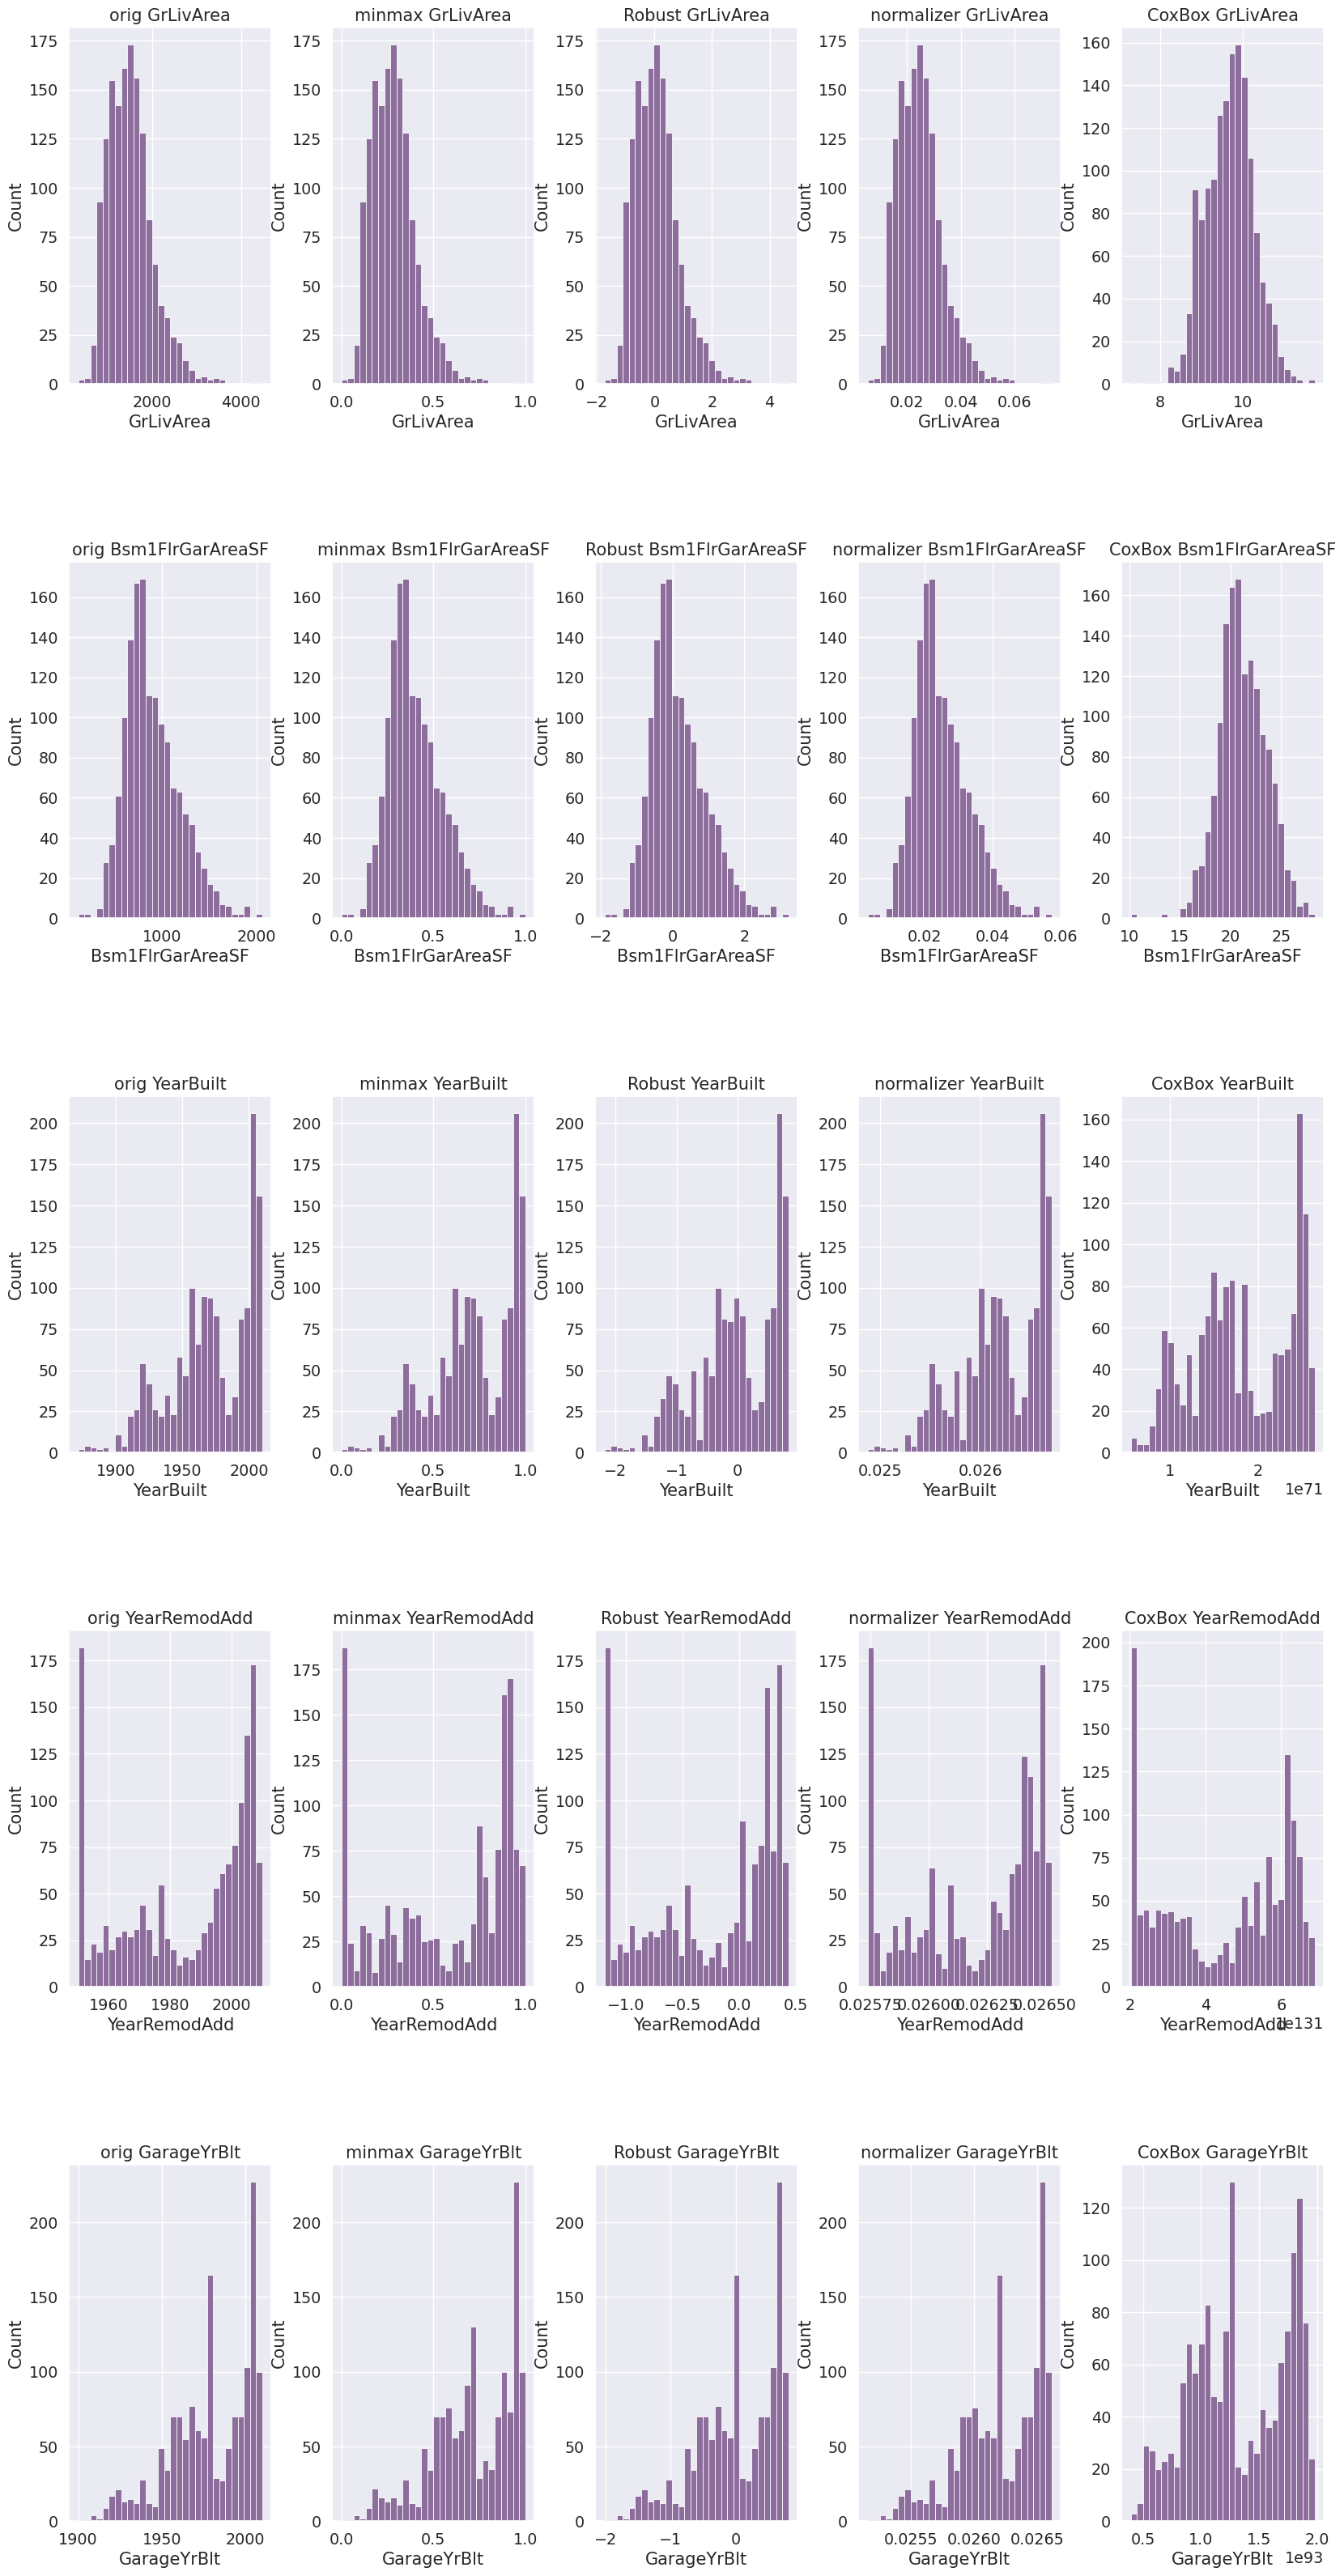

In [178]:
import warnings
warnings.filterwarnings('ignore')
conti.columns
fig, axi = plt.subplots(5,5, figsize=(20,40))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Obtener las primeras 5 columnas de conti
conti_subset = conti.iloc[:, :5]

for i, (column_name, column_data) in enumerate(conti_subset.items()):
    for col in range(5):
        # Columna original
        sns.histplot(column_data, bins=30, ax=axi[i, 0])
        axi[i, 0].set_title(f'orig {column_name}')

        # MinMaxScaler
        mm_scaler = MinMaxScaler()
        mm_res = pd.DataFrame(mm_scaler.fit_transform(column_data.values.reshape(-1, 1)), columns=[column_name])
        sns.histplot(mm_res[column_name], bins=30, ax=axi[i, 1])
        axi[i, 1].set_title(f'minmax {column_name}')

        # RobustScaler
        robust_scaler = RobustScaler()
        r_res = pd.DataFrame(robust_scaler.fit_transform(column_data.values.reshape(-1, 1)), columns=[column_name])
        sns.histplot(r_res[column_name], bins=30, ax=axi[i, 2])
        axi[i, 2].set_title(f'Robust {column_name}')

        # Normalizer
        normalizer = Normalizer()
        n_res = pd.DataFrame(normalizer.fit_transform(column_data.values.reshape(1, -1)).T, columns=[column_name])
        sns.histplot(n_res[column_name], bins=30, ax=axi[i, 3])
        axi[i, 3].set_title(f'normalizer {column_name}')

        # Boxcox
        res, _ = boxcox(column_data + 1)  # Agregar 1 para evitar valores negativos
        res1 = pd.DataFrame(res, columns=[column_name])
        sns.histplot(res1[column_name], bins=30, ax=axi[i, 4])
        axi[i, 4].set_title(f'CoxBox {column_name}')

plt.show()

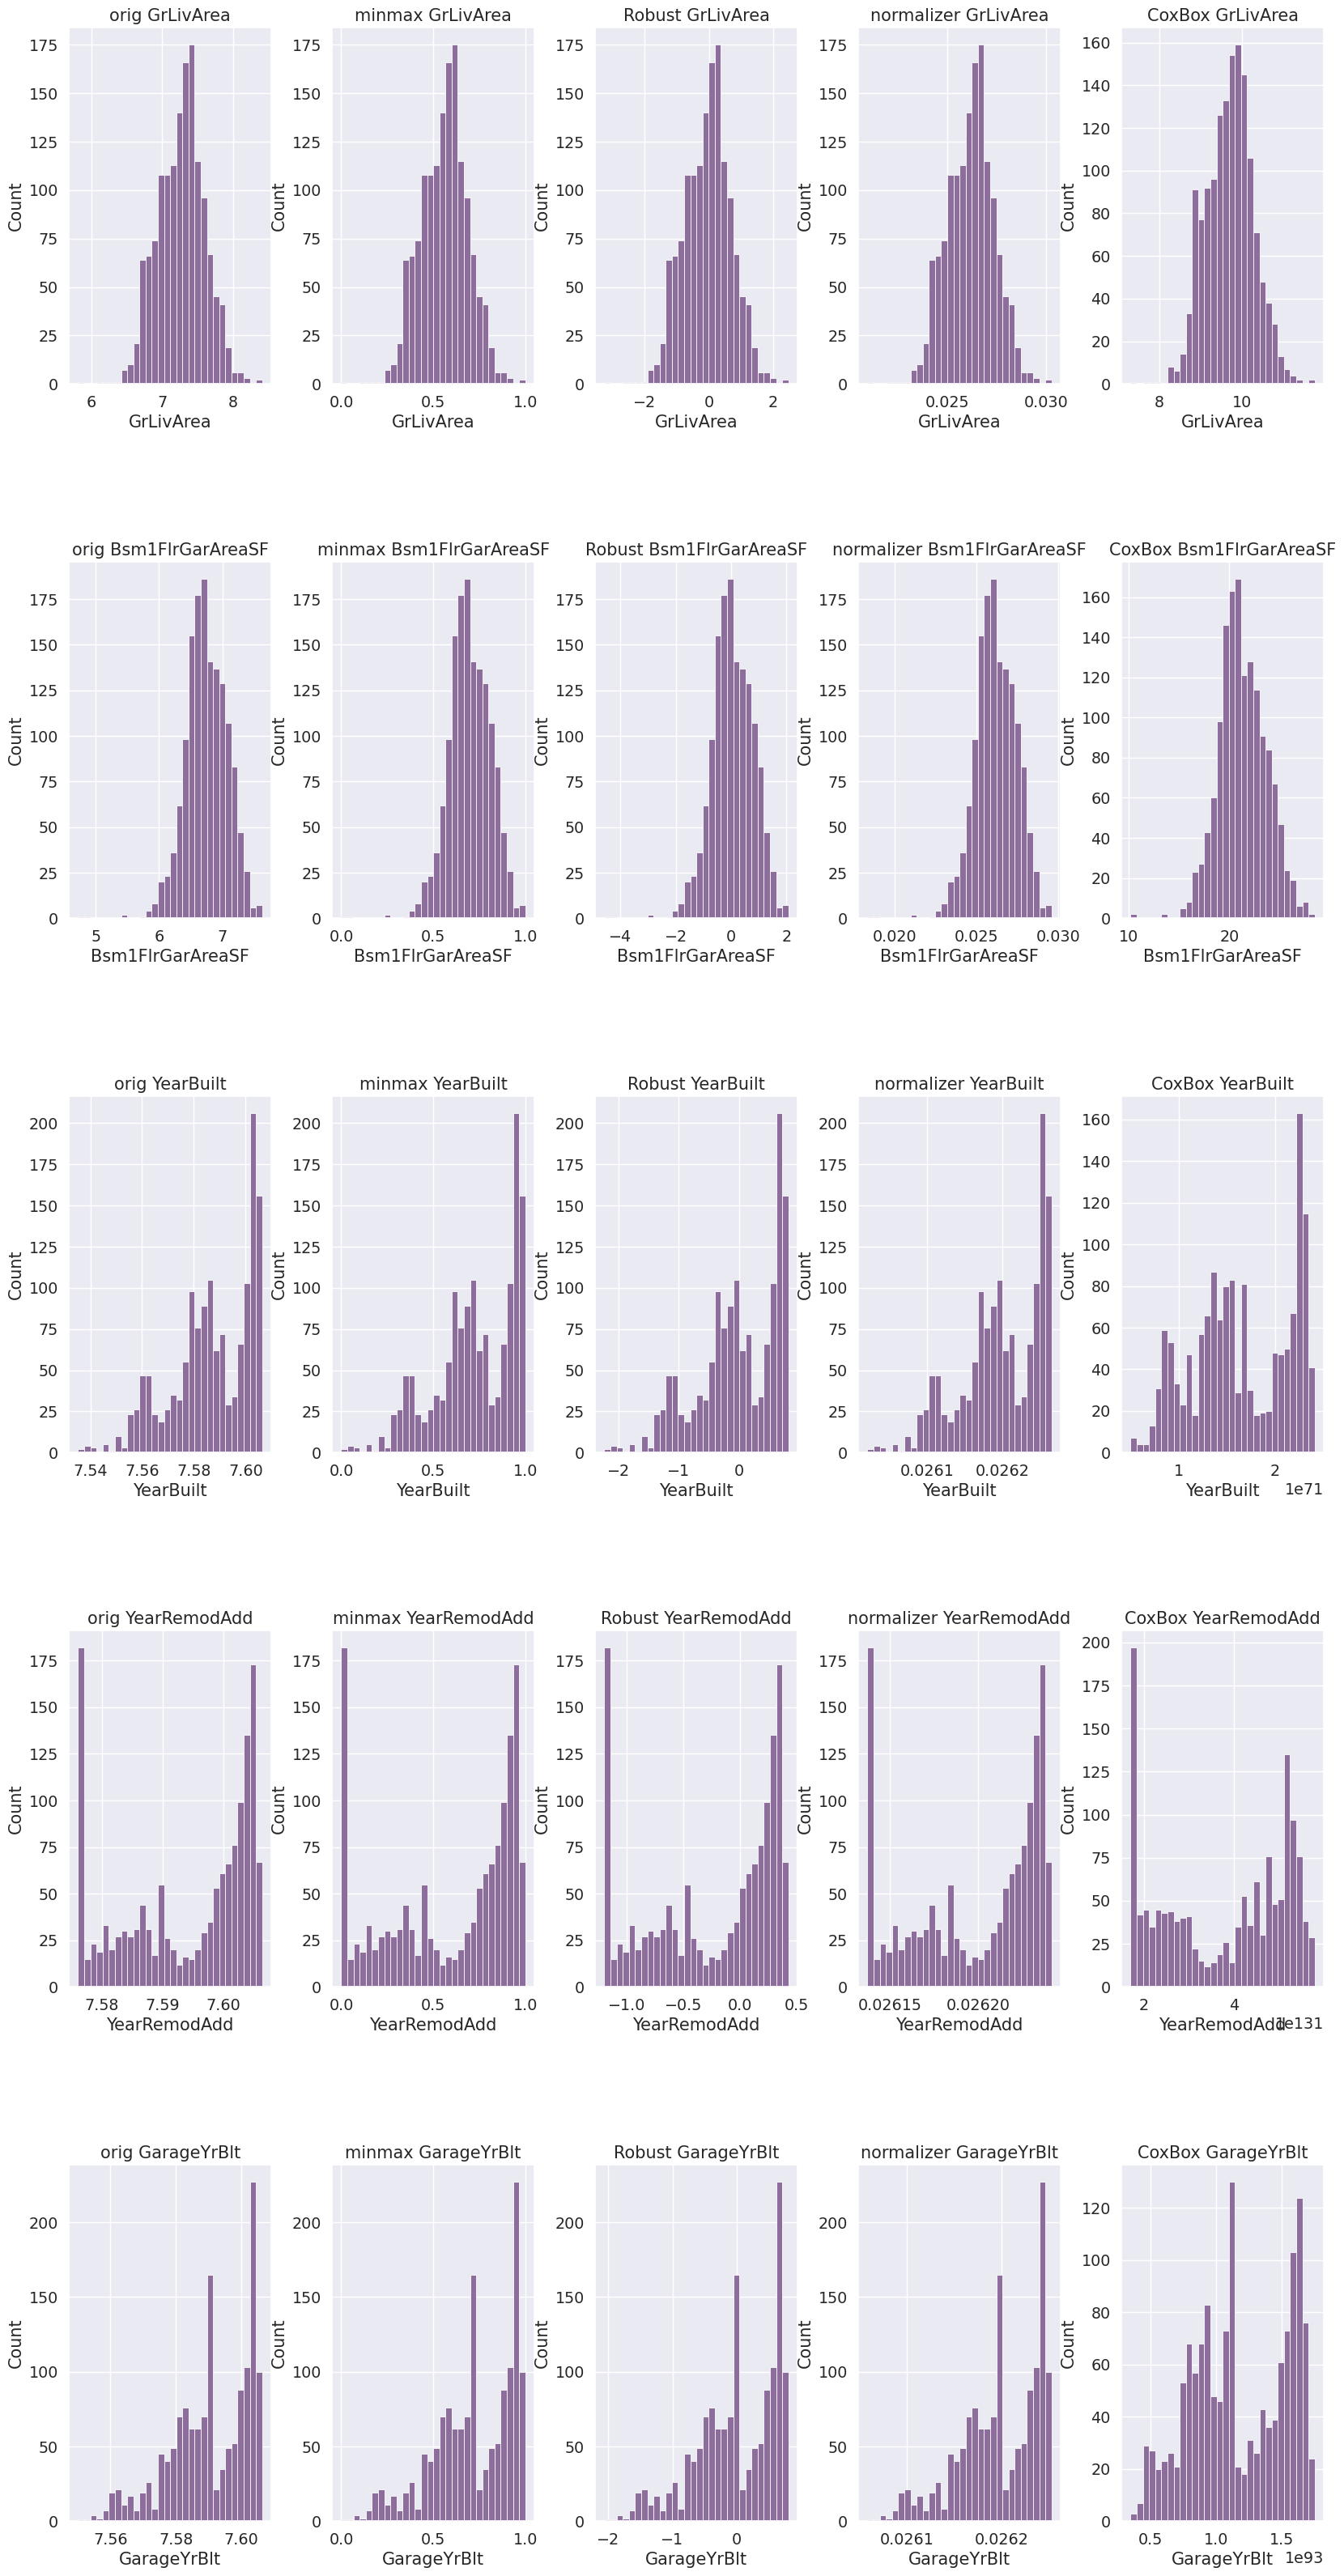

In [186]:
import warnings
warnings.filterwarnings('ignore')
conti.columns
fig, axi = plt.subplots(5,5, figsize=(20,40))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Obtener las primeras 5 columnas de conti
conti_subset = conti.iloc[:, :5]

for i, (column_name, column_data) in enumerate(conti_subset.items()):
    for col in range(5):
        # Columna original
        sns.histplot(np.log(column_data +1), bins=30, ax=axi[i, 0])
        axi[i, 0].set_title(f'orig {column_name}')

        # MinMaxScaler
        mm_scaler = MinMaxScaler()
        mm_res = pd.DataFrame(mm_scaler.fit_transform(np.log(column_data+1).values.reshape(-1, 1)), columns=[column_name])
        sns.histplot(mm_res[column_name], bins=30, ax=axi[i, 1])
        axi[i, 1].set_title(f'minmax {column_name}')

        # RobustScaler
        robust_scaler = RobustScaler()
        r_res = pd.DataFrame(robust_scaler.fit_transform(np.log(column_data +1).values.reshape(-1, 1)), columns=[column_name])
        sns.histplot(r_res[column_name], bins=30, ax=axi[i, 2])
        axi[i, 2].set_title(f'Robust {column_name}')

        # Normalizer
        normalizer = Normalizer()
        n_res = pd.DataFrame(normalizer.fit_transform(np.log(column_data+1).values.reshape(1, -1)).T, columns=[column_name])
        sns.histplot(n_res[column_name], bins=30, ax=axi[i, 3])
        axi[i, 3].set_title(f'normalizer {column_name}')

        # Boxcox
        res, _ = boxcox(column_data )  # Agregar 1 para evitar valores negativos
        res1 = pd.DataFrame(res, columns=[column_name])
        sns.histplot(res1[column_name], bins=30, ax=axi[i, 4])
        axi[i, 4].set_title(f'CoxBox {column_name}')

plt.show()

In [96]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

ran = SMOTE(sampling_strategy = 0.5)

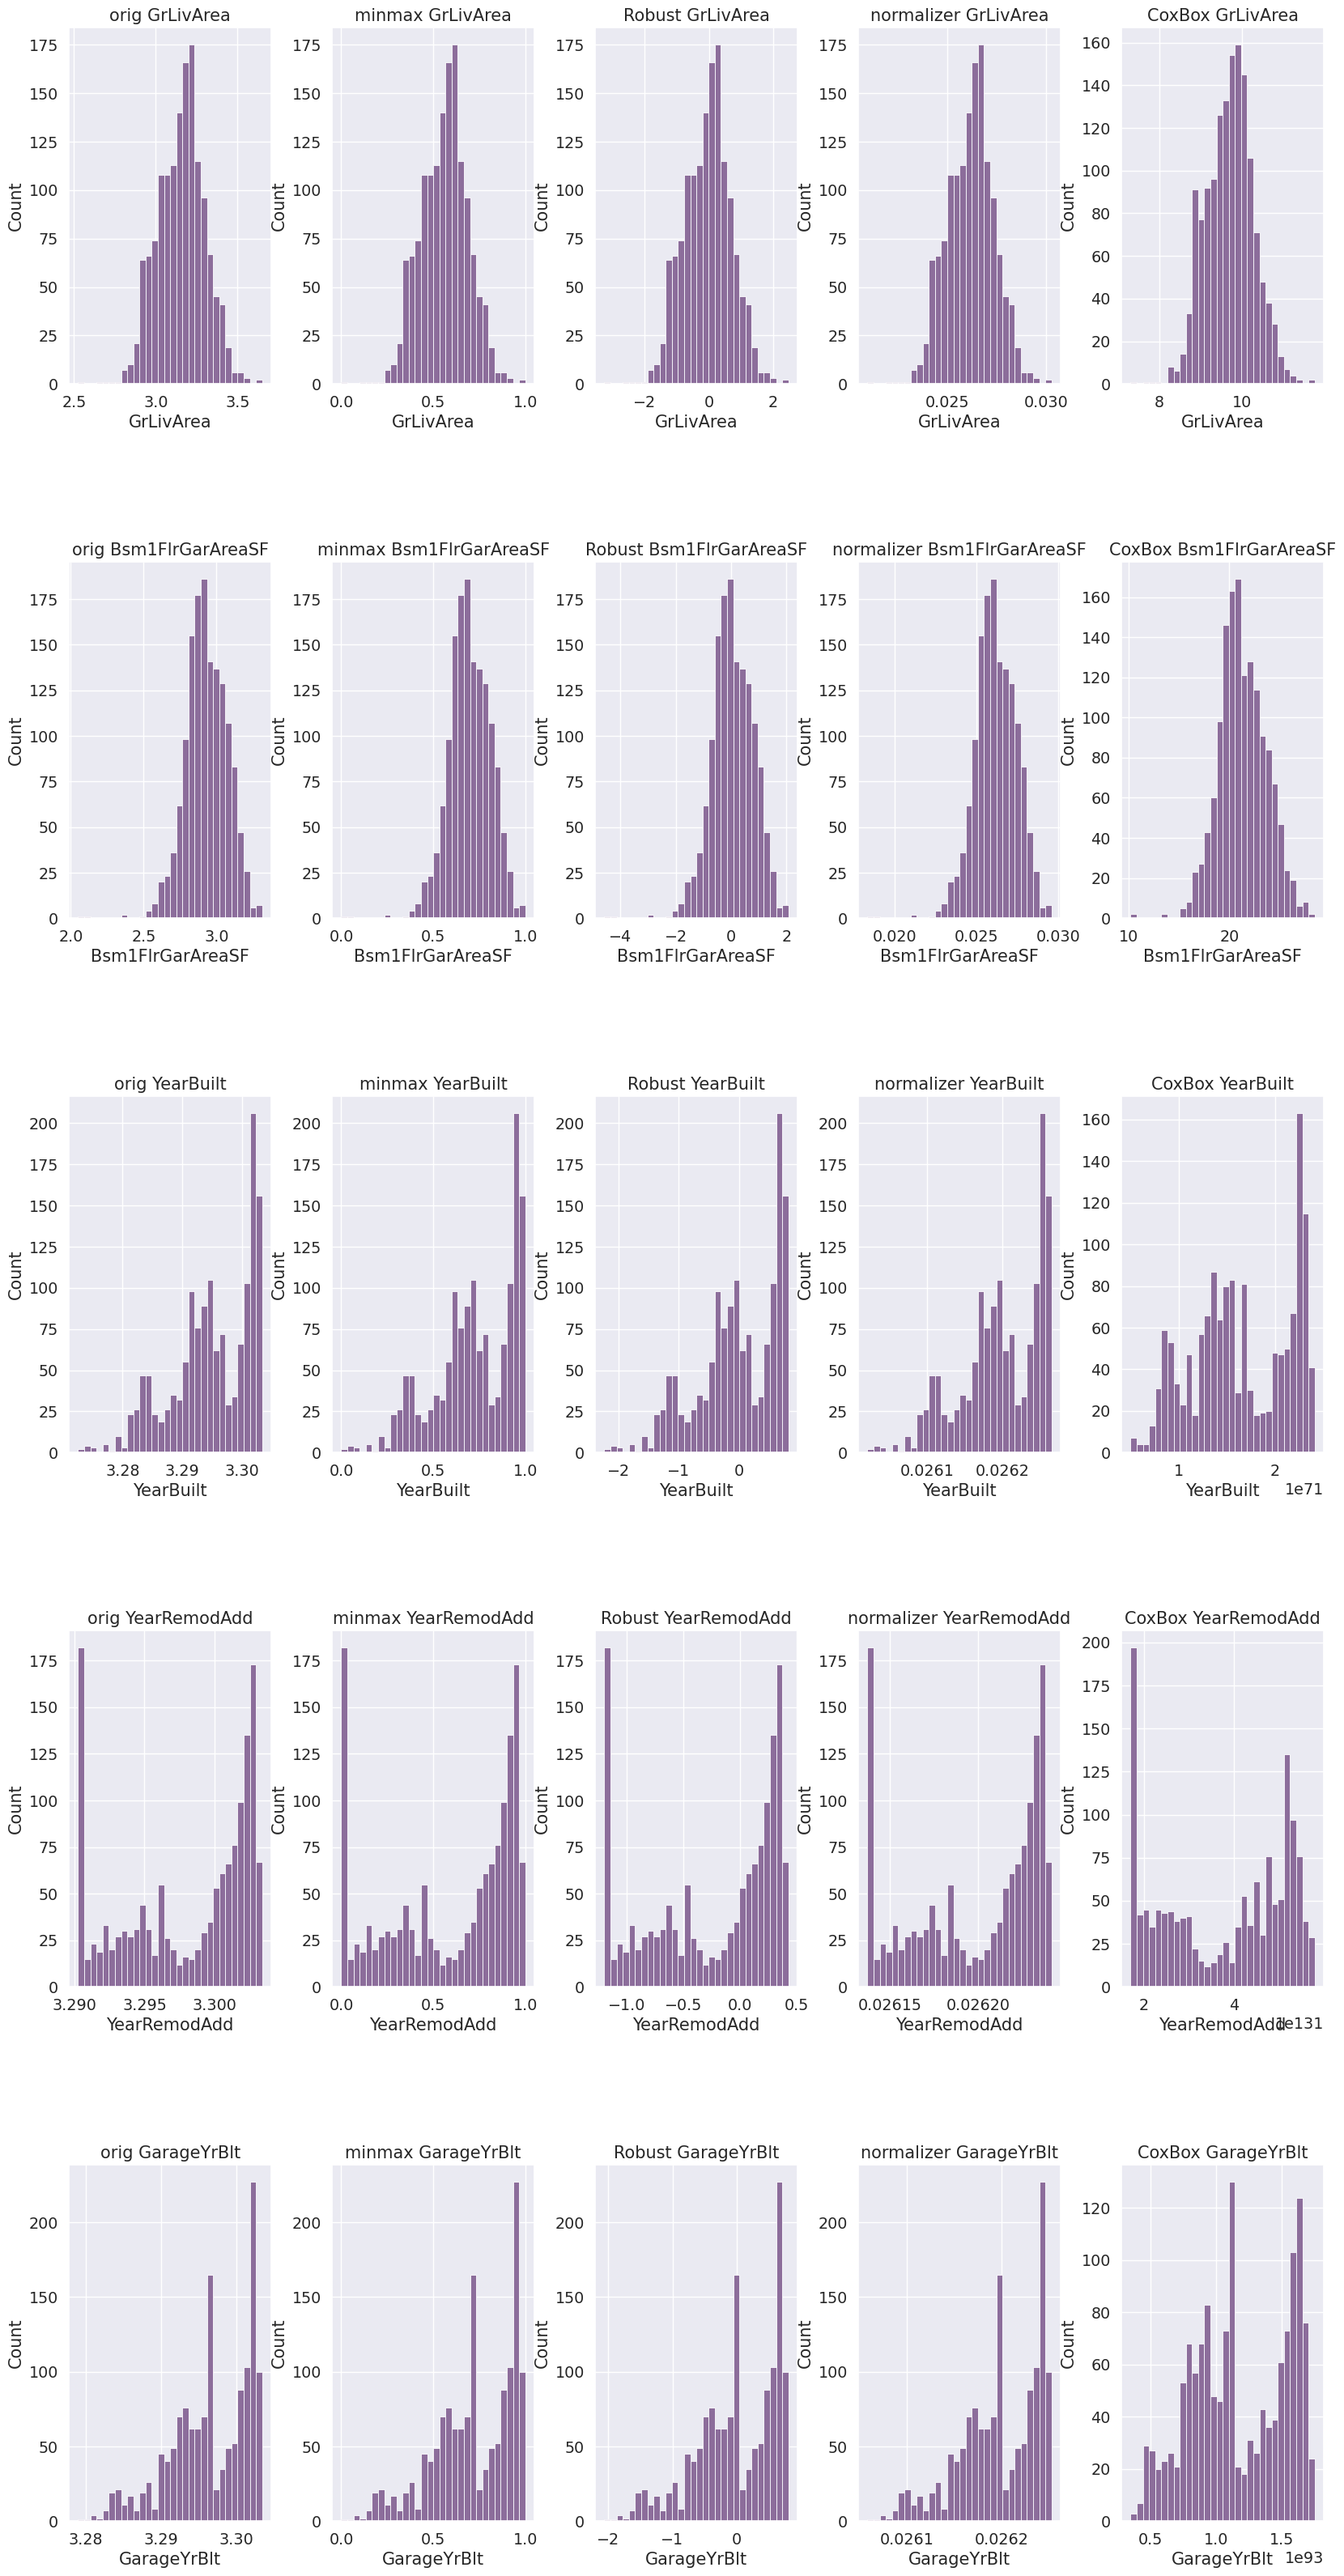

In [187]:
import warnings
warnings.filterwarnings('ignore')
conti.columns
fig, axi = plt.subplots(5,5, figsize=(20,40))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Obtener las primeras 5 columnas de conti
conti_subset = conti.iloc[:, :5]

for i, (column_name, column_data) in enumerate(conti_subset.items()):
    for col in range(5):
        # Columna original
        sns.histplot(np.log10(column_data +1), bins=30, ax=axi[i, 0])
        axi[i, 0].set_title(f'orig {column_name}')

        # MinMaxScaler
        mm_scaler = MinMaxScaler()
        mm_res = pd.DataFrame(mm_scaler.fit_transform(np.log10(column_data+1).values.reshape(-1, 1)), columns=[column_name])
        sns.histplot(mm_res[column_name], bins=30, ax=axi[i, 1])
        axi[i, 1].set_title(f'minmax {column_name}')

        # RobustScaler
        robust_scaler = RobustScaler()
        r_res = pd.DataFrame(robust_scaler.fit_transform(np.log10(column_data +1).values.reshape(-1, 1)), columns=[column_name])
        sns.histplot(r_res[column_name], bins=30, ax=axi[i, 2])
        axi[i, 2].set_title(f'Robust {column_name}')

        # Normalizer
        normalizer = Normalizer()
        n_res = pd.DataFrame(normalizer.fit_transform(np.log10(column_data+1).values.reshape(1, -1)).T, columns=[column_name])
        sns.histplot(n_res[column_name], bins=30, ax=axi[i, 3])
        axi[i, 3].set_title(f'normalizer {column_name}')

        # Boxcox
        res, _ = boxcox(column_data )  # Agregar 1 para evitar valores negativos
        res1 = pd.DataFrame(res, columns=[column_name])
        sns.histplot(res1[column_name], bins=30, ax=axi[i, 4])
        axi[i, 4].set_title(f'CoxBox {column_name}')

plt.show()

In [194]:
np.log10(1000)

3.0